Best solution: a0=12.3862809502188, a1=-8.985020592283005, a2=6.770177141347049, a3=2.643586394682483, a4=0.0026088128257302223, a5=2.9943025383152415
Best solution fitness (MSE): 527.6267137179777


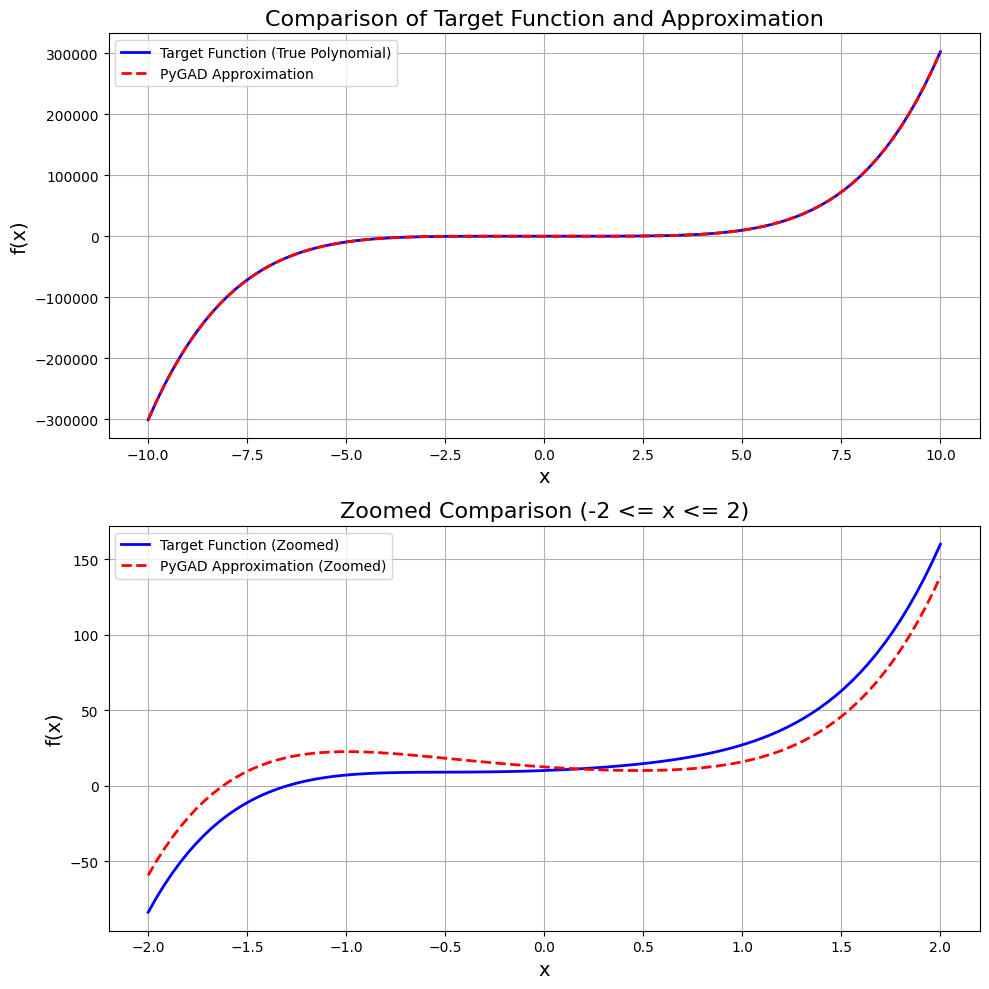

True coefficients: [10, 5, 7, 2, 0, 3]
Found coefficients: a0=12.3862809502188, a1=-8.985020592283005, a2=6.770177141347049, a3=2.643586394682483, a4=0.0026088128257302223, a5=2.9943025383152415


In [66]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Целевая функция (сложный полином)
def target_function(x):
    return 3*x**5 + 2*x**3 + 7*x**2 + 5*x + 10

# Истинные коэффициенты целевого полинома
true_coeffs = [10, 5, 7, 2, 0, 3]

# Тренировочные данные
x_data = np.linspace(-10, 10, 100)
y_data = target_function(x_data)

# Функция приспособленности
def fitness_func(ga_instance, solution, solution_idx):
    a0, a1, a2, a3, a4, a5 = solution
    y_pred = a0 + a1 * x_data + a2 * (x_data**2) + a3 * (x_data**3) + a4 * (x_data**4) + a5 * (x_data**5)
    mse = np.mean((y_data - y_pred)**2)
    return -mse

# Настройки ГА с фиксированным seed
ga_instance = pygad.GA(num_generations=5000,
                       num_parents_mating=5,
                       fitness_func=fitness_func,
                       sol_per_pop=12,
                       num_genes=6,
                       mutation_num_genes=1,
                       mutation_percent_genes=33,
                       mutation_type="random",
                       crossover_type="single_point",
                       random_seed=42)  # Устанавливаем seed для воспроизводимости

# Запускаем ГА
ga_instance.run()

# Оптимальные коэффициенты полинома
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Best solution: a0={solution[0]}, a1={solution[1]}, a2={solution[2]}, a3={solution[3]}, a4={solution[4]}, a5={solution[5]}")
print(f"Best solution fitness (MSE): {-solution_fitness}")

# Аппроксимированная функция на основе найденных коэффициентов
def approximated_function(x, coeffs):
    a0, a1, a2, a3, a4, a5 = coeffs
    return a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4 + a5 * x**5

# Рассчитываем значения аппроксимированной функции
y_approx = approximated_function(x_data, solution)

# Визуализация двух графиков: полный и приближенный
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# 1. Полный график
axs[0].plot(x_data, y_data, label="Target Function (True Polynomial)", color="blue", linewidth=2)
axs[0].plot(x_data, y_approx, label="PyGAD Approximation", linestyle='--', color="red", linewidth=2)
axs[0].set_title("Comparison of Target Function and Approximation", fontsize=16)
axs[0].set_xlabel("x", fontsize=14)
axs[0].set_ylabel("f(x)", fontsize=14)
axs[0].legend()
axs[0].grid(True)

# 2. Приближенный график (например, от -5 до 5)
x_zoomed = np.linspace(-2, 2, 100)
y_true_zoomed = target_function(x_zoomed)
y_approx_zoomed = approximated_function(x_zoomed, solution)

axs[1].plot(x_zoomed, y_true_zoomed, label="Target Function (Zoomed)", color="blue", linewidth=2)
axs[1].plot(x_zoomed, y_approx_zoomed, label="PyGAD Approximation (Zoomed)", linestyle='--', color="red", linewidth=2)
axs[1].set_title("Zoomed Comparison (-2 <= x <= 2)", fontsize=16)
axs[1].set_xlabel("x", fontsize=14)
axs[1].set_ylabel("f(x)", fontsize=14)
axs[1].legend()
axs[1].grid(True)

# Показываем оба графика
plt.tight_layout()
plt.show()

# Вывод истинных и найденных коэффициентов
print(f"True coefficients: {true_coeffs}")
print(f"Found coefficients: a0={solution[0]}, a1={solution[1]}, a2={solution[2]}, a3={solution[3]}, a4={solution[4]}, a5={solution[5]}")


Best individual: [123.37245868305921, 156.14760309797427, -3.9420601417309475, -4.906281639328858, 0.11965004746170739, 3.060903401370439]
Best fitness (MSE): 69082.3576862758


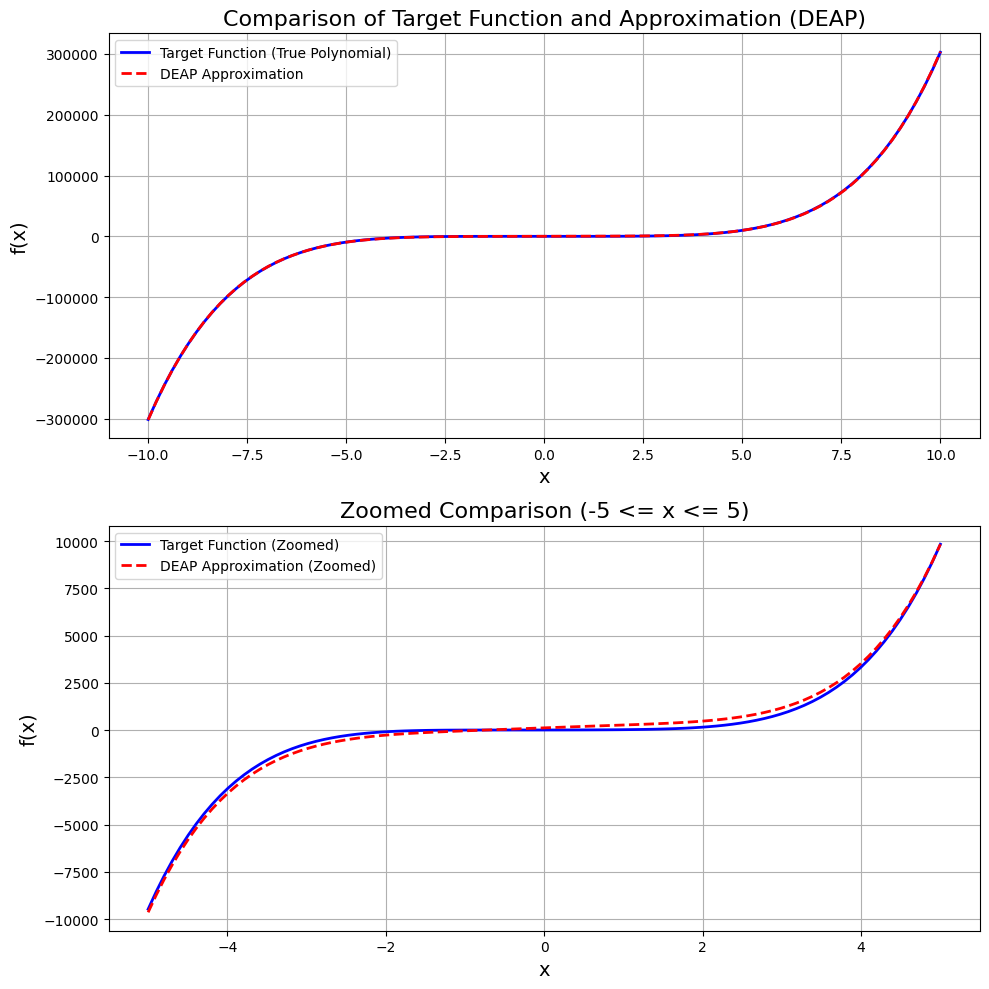

True coefficients: [10, 5, 7, 2, 0, 3]
Best individual coefficients: [123.37245868305921, 156.14760309797427, -3.9420601417309475, -4.906281639328858, 0.11965004746170739, 3.060903401370439]


In [67]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Целевая функция (сложный полином)
def target_function(x):
    return 3*x**5 + 2*x**3 + 7*x**2 + 5*x + 10

# Истинные коэффициенты целевого полинома
true_coefficients = [10, 5, 7, 2, 0, 3]

# Тренировочные данные
x_data = np.linspace(-10, 10, 100)
y_data = target_function(x_data)

# Функция для оценки приспособленности (fitness function)
def fitness_function(individual):
    # Разворачиваем решение, как набор коэффициентов полинома
    a0, a1, a2, a3, a4, a5 = individual
    
    # Строим предсказанную функцию на основе коэффициентов полинома
    y_pred = a0 + a1 * x_data + a2 * (x_data**2) + a3 * (x_data**3) + a4 * (x_data**4) + a5 * (x_data**5)
    
    # Рассчитываем среднеквадратичную ошибку
    mse = np.mean((y_data - y_pred)**2)
    
    # Возвращаем отрицательную ошибку, так как алгоритм максимизирует приспособленность
    return -mse,

# Установка параметров генетического алгоритма DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Создаем индивидуумов (индивидов), каждый из которых содержит 6 генов (коэффициентов полинома)
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)  # Гены принимают значения в диапазоне [-10, 10]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=6)  # 6 генов
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Операторы генетического алгоритма
toolbox.register("mate", tools.cxTwoPoint)  # Двухточечный кроссовер
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)  # Гауссовская мутация
toolbox.register("select", tools.selTournament, tournsize=3)  # Турнирная селекция
toolbox.register("evaluate", fitness_function)  # Функция приспособленности

# Фиксируем seed для воспроизводимости
random.seed(42)

# Генерируем начальную популяцию из 20 индивидуумов
population = toolbox.population(n=20)

# Запускаем генетический алгоритм
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=5000, verbose=False)

# После завершения алгоритма получаем лучшего индивидуума
best_individual = tools.selBest(population, k=1)[0]

# Выводим результат
print(f"Best individual: {best_individual}")
print(f"Best fitness (MSE): {-best_individual.fitness.values[0]}")

# Аппроксимированная функция на основе найденных коэффициентов
def approximated_function(x, coeffs):
    a0, a1, a2, a3, a4, a5 = coeffs
    return a0 + a1 * x + a2 * x**2 + a3 * x**3 + a4 * x**4 + a5 * x**5

# Рассчитываем значения аппроксимированной функции
y_approx = approximated_function(x_data, best_individual)

# Визуализация двух графиков: полный и приближенный
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# 1. Полный график
axs[0].plot(x_data, y_data, label="Target Function (True Polynomial)", color="blue", linewidth=2)
axs[0].plot(x_data, y_approx, label="DEAP Approximation", linestyle='--', color="red", linewidth=2)
axs[0].set_title("Comparison of Target Function and Approximation (DEAP)", fontsize=16)
axs[0].set_xlabel("x", fontsize=14)
axs[0].set_ylabel("f(x)", fontsize=14)
axs[0].legend()
axs[0].grid(True)

# 2. Приближенный график (например, от -5 до 5)
x_zoomed = np.linspace(-5, 5, 100)
y_true_zoomed = target_function(x_zoomed)
y_approx_zoomed = approximated_function(x_zoomed, best_individual)

axs[1].plot(x_zoomed, y_true_zoomed, label="Target Function (Zoomed)", color="blue", linewidth=2)
axs[1].plot(x_zoomed, y_approx_zoomed, label="DEAP Approximation (Zoomed)", linestyle='--', color="red", linewidth=2)
axs[1].set_title("Zoomed Comparison (-5 <= x <= 5)", fontsize=16)
axs[1].set_xlabel("x", fontsize=14)
axs[1].set_ylabel("f(x)", fontsize=14)
axs[1].legend()
axs[1].grid(True)

# Показываем оба графика
plt.tight_layout()
plt.show()

# Дополнительно: Сравним найденные коэффициенты с истинными для проверки точности
print(f"True coefficients: {true_coefficients}")
print(f"Best individual coefficients: {best_individual}")


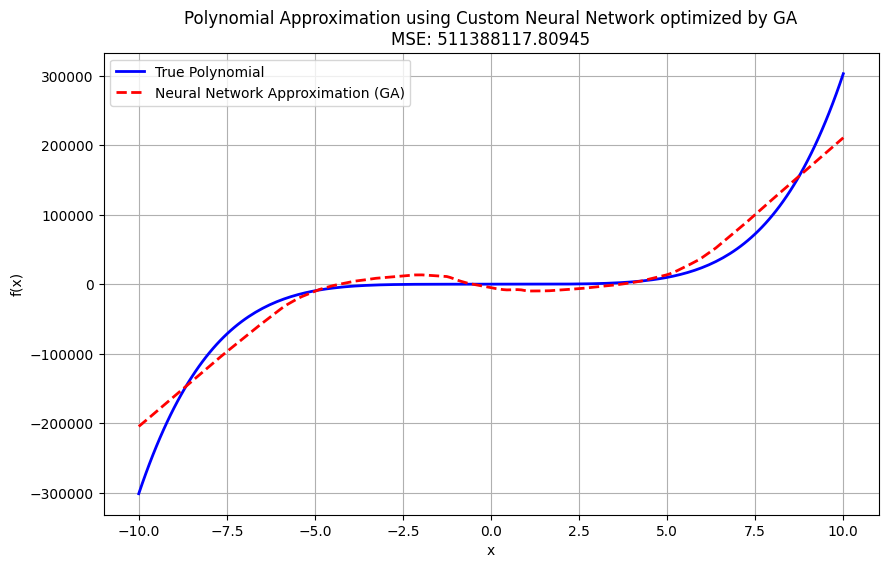

Final Mean Squared Error (MSE): 511388117.8094505


In [18]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

# ===== Гиперпараметры =====
num_hidden_layers = 2  # Число скрытых слоёв (можно установить в 1 или 2)
neurons_hidden_layer = 64  # Количество нейронов в скрытом слое
input_size = 1  # Размер входного слоя (для полинома 1 переменная)
output_size = 1  # Размер выходного слоя (1 значение y)

# ===== Определяем полином для аппроксимации =====
def target_function(x):
    return 3 * x**5 + 2 * x**3 + 7 * x**2 + 5 * x + 10

# Генерируем данные
x_data = np.linspace(-10, 10, 200).reshape(-1, 1)  # 200 точек от -10 до 10
y_data = target_function(x_data).reshape(-1, 1)     # Значения целевого полинома

# ===== Определяем активационную функцию =====
def relu(x):
    return np.maximum(0, x)

# Прямой проход (feedforward) через нейросеть
def feedforward(weights, x):
    start = 0
    
    # Первый слой (вход -> скрытый слой 1)
    W1 = weights[start:start + input_size * neurons_hidden_layer].reshape((input_size, neurons_hidden_layer))
    start += input_size * neurons_hidden_layer
    b1 = weights[start:start + neurons_hidden_layer].reshape((1, neurons_hidden_layer))
    start += neurons_hidden_layer
    h1 = relu(np.dot(x, W1) + b1)

    # Если второй скрытый слой нужен
    if num_hidden_layers == 2:
        W2 = weights[start:start + neurons_hidden_layer * neurons_hidden_layer].reshape((neurons_hidden_layer, neurons_hidden_layer))
        start += neurons_hidden_layer * neurons_hidden_layer
        b2 = weights[start:start + neurons_hidden_layer].reshape((1, neurons_hidden_layer))
        start += neurons_hidden_layer
        h2 = relu(np.dot(h1, W2) + b2)
    else:
        h2 = h1

    # Выходной слой (скрытый слой -> выход)
    W_out = weights[start:start + neurons_hidden_layer * output_size].reshape((neurons_hidden_layer, output_size))
    start += neurons_hidden_layer * output_size
    b_out = weights[start:start + output_size].reshape((1, output_size))
    
    y_pred = np.dot(h2, W_out) + b_out
    return y_pred

# ===== Генетический алгоритм PyGAD =====
# Вычисляем количество весов для нейросети
num_weights = input_size * neurons_hidden_layer + neurons_hidden_layer  # Слои вход -> скрытый 1
if num_hidden_layers == 2:
    num_weights += neurons_hidden_layer * neurons_hidden_layer + neurons_hidden_layer  # Скрытый 1 -> скрытый 2
num_weights += neurons_hidden_layer * output_size + output_size  # Скрытый 2 -> выход

# Функция приспособленности для ГА
def fitness_function(ga_instance, solution, solution_idx):
    y_pred = feedforward(solution, x_data)
    mse = np.mean((y_data - y_pred)**2)
    return -mse  # Отрицательная MSE, т.к. PyGAD максимизирует

# Настройка генетического алгоритма
ga_instance = pygad.GA(num_generations=300,            # Количество поколений
                       num_parents_mating=10,          # Число родителей для спаривания
                       fitness_func=fitness_function,  # Функция приспособленности
                       sol_per_pop=100,                 # Размер популяции
                       num_genes=num_weights,          # Количество генов (весов нейросети)
                       mutation_percent_genes=33)      # Процент генов для мутации

# Запуск генетического алгоритма
ga_instance.run()

# Получение наилучшего решения
best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()

# Вычисляем предсказания и среднеквадратичную ошибку (MSE)
y_pred = feedforward(best_solution, x_data)
mse_final = np.mean((y_data - y_pred)**2)

# ===== Визуализация результата =====
plt.figure(figsize=(10, 6))

# Истинные значения полинома
plt.plot(x_data, y_data, label='True Polynomial', color='blue', linewidth=2)

# Аппроксимированные значения, предсказанные нейросетью
plt.plot(x_data, y_pred, label='Neural Network Approximation (GA)', color='red', linestyle='--', linewidth=2)

# Вывод MSE в заголовке
plt.title(f'Polynomial Approximation using Custom Neural Network optimized by GA\nMSE: {mse_final:.5f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Выводим MSE в консоль
print(f"Final Mean Squared Error (MSE): {mse_final}")
